# Covid19 USA States

In [1]:
import sys
import os
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *

Starting qgis application

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')

In [3]:
project = QgsProject.instance()

Load shapefile of USA States

In [4]:
# load map layer
usa_path = "data/usa_states_map/tl_2017_us_state.shp"
usa_layer = QgsVectorLayer(usa_path, 'USA States Map', 'ogr')

if not usa_layer.isValid():
    print("Failed to load the layer!")
else:
    crs = QgsCoordinateReferenceSystem('EPSG:5071')
    usa_layer.setCrs(crs)
    project.addMapLayer(usa_layer)

Load a CSV file, about Covid-19 and show it's content

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-27-2020.csv")
df.head(df.shape[0])

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-28 02:32:46,32.3182,-86.9023,6539,228,NaN,6311.0,1.0,139.457105,73997.0,872.0,3.486772,84000001,USA,1578.132341,13.335372
1,Alaska,US,2020-04-28 02:32:46,61.3707,-152.4044,345,9,218.0,336.0,2.0,57.716533,16256.0,10.0,2.608696,84000002,USA,2719.536126,2.898551
2,American Samoa,US,2020-04-28 02:32:46,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-28 02:32:46,33.7298,-111.4312,6725,275,1418.0,6450.0,4.0,92.392657,66543.0,1051.0,4.089219,84000004,USA,914.213315,15.628253
4,Arkansas,US,2020-04-28 02:32:46,34.9697,-92.3731,3069,51,987.0,3018.0,5.0,118.538741,40457.0,109.0,1.661779,84000005,USA,1562.633375,3.551645
5,California,US,2020-04-28 02:32:46,36.1162,-119.6816,44966,1779,NaN,43187.0,6.0,114.683965,553409.0,4878.0,3.956323,84000006,USA,1411.447279,10.848196
6,Colorado,US,2020-04-28 02:32:46,39.0598,-105.3111,13879,706,2150.0,13173.0,8.0,244.917205,63274.0,2438.0,5.086822,84000008,USA,1116.571166,17.566107
7,Connecticut,US,2020-04-28 02:32:46,41.5978,-72.7554,25997,2012,NaN,23985.0,9.0,729.169910,79811.0,1758.0,7.739355,84000009,USA,2238.557513,6.762319
8,Delaware,US,2020-04-28 02:32:46,39.3185,-75.5071,4162,125,996.0,4037.0,10.0,427.413624,19616.0,325.0,3.003364,84000010,USA,2014.451140,7.808746
9,Diamond Princess,US,2020-04-28 02:32:46,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


Plot the number of infected in each state

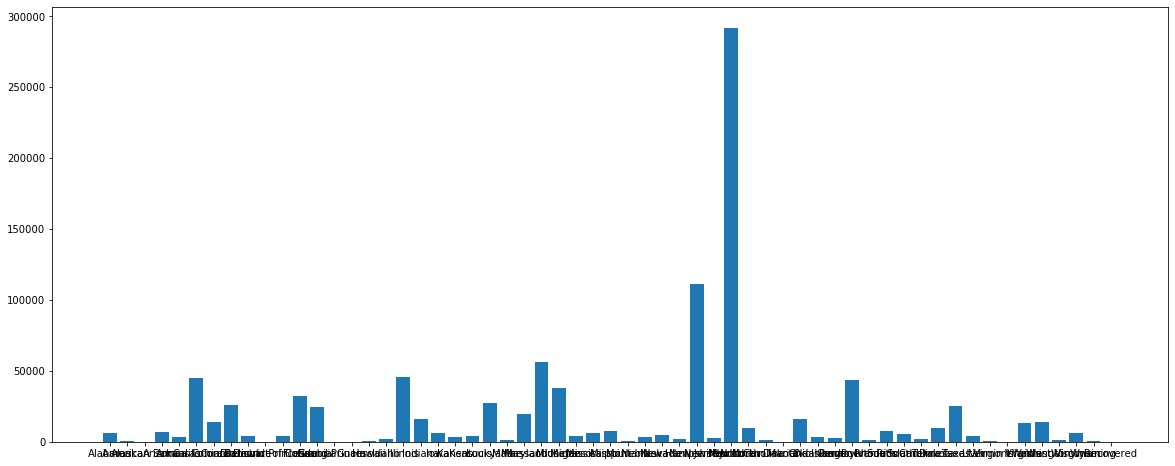

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.bar(df.Province_State, df.Confirmed)
plt.show()

Load CSV file of covid19 data and create a vector layer

In [7]:
dates = ['04-13-2020', '04-20-2020', '04-27-2020']

def loadCSVVectorLayer(date):
    # load covid-19 numbers 04-13-2020
    covid_path = "file:///E:/TA-Cartografia/data/covid19-usa/{}.csv".format(date)
    layer_name = 'covid{}'.format(date)
    covid_layer = QgsVectorLayer(covid_path, layer_name, 'delimitedtext')

    if not covid_layer.isValid():
        print('Layer failed to load!')
    else:
        project.addMapLayer(covid_layer)
        
for date in dates:
    loadCSVVectorLayer(date)

Join CSV layers to USA layer

In [8]:
targetField = 'NAME'
joinField = 'Province_State'

In [9]:
def joinCSVSHPVectorLayers(csv_layer):
    joinObject = QgsVectorLayerJoinInfo()
    joinObject.setJoinFieldName(joinField)
    joinObject.setTargetFieldName(targetField)
    joinObject.setJoinLayerId(csv_layer.id())
    joinObject.setUsingMemoryCache(True)
    joinObject.setJoinLayer(csv_layer)
    flag = usa_layer.addJoin(joinObject)
    return flag
    
for date in dates:
    layer_name = 'covid{}'.format(date)
    csv_layer = project.mapLayersByName(layer_name)[0]
    flag = joinCSVSHPVectorLayers(csv_layer)

Add a new field to the vector layer

In [10]:
caps = usa_layer.dataProvider().capabilities()

if caps & QgsVectorDataProvider.AddAttributes:
    new_fields = [
        QgsField("d13_20", QVariant.Int),
        QgsField("d20_27", QVariant.Int),
        QgsField("delta", QVariant.Int)
    ]
    res = usa_layer.dataProvider().addAttributes(new_fields)
usa_layer.updateFields()

Remove features without confirmed cases

In [11]:
del_ids = []

def removeFeature(conf1, conf2, conf3):
    flag1 = conf1 is None or conf1 == 0
    flag2 = conf2 is None or conf2 == 0
    flag3 = conf3 is None or conf3 == 0
    return flag1 or flag2 or flag3

if caps & QgsVectorDataProvider.DeleteFeatures:
    for feature in usa_layer.getFeatures():
        conf1 = feature['covid04-27-2020_Confirmed']
        conf2 = feature['covid04-20-2020_Confirmed']
        conf3 = feature['covid04-13-2020_Confirmed']
        if removeFeature(conf1, conf2, conf3):
            del_ids.append(feature.id())
    res = usa_layer.dataProvider().deleteFeatures(del_ids)

Update delta fields of each feature

In [12]:
updateFeat = {}
fid1 = usa_layer.fields().indexFromName('d13_20')
fid2 = usa_layer.fields().indexFromName('d20_27')
fid3 = usa_layer.fields().indexFromName('delta')

for feature in usa_layer.getFeatures():
    conf13 = feature['covid04-13-2020_Confirmed']
    conf20 = feature['covid04-20-2020_Confirmed']
    conf27 = feature['covid04-27-2020_Confirmed']
    attrs = {}
    attrs[fid1] = conf20 - conf13
    attrs[fid2] = conf27 - conf20
    attrs[fid3] = attrs[fid2] - attrs[fid1]
    updateFeat[feature.id()] = attrs
usa_layer.dataProvider().changeAttributeValues(updateFeat)

True

Display a graph with the number of infected

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Retrieving the data

In [14]:
# data
states_list = ['California', 'Colorado', 'Minnesota', 'New Jersey', 'New York', 'Texas']
delta1 = []
delta2 = []
states = []

for feature in usa_layer.getFeatures():
    if feature['NAME'] in states_list:
        states.append(feature['NAME'])
        delta1.append(feature['d13_20'])
        delta2.append(feature['d20_27'])

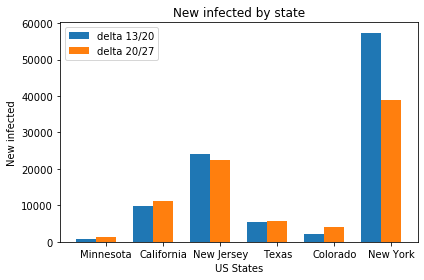

In [15]:
# create plot
fig, ax = plt.subplots()
index = np.arange(len(delta1))
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='delta 13/20')

rects2 = plt.bar(index + bar_width, delta2, bar_width, label='delta 20/27')

plt.xlabel('US States')
plt.ylabel('New infected')
plt.title('New infected by state')
plt.xticks(index + bar_width, tuple(states))
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
target_field = 'delta'
myRangeList = []

symbol = QgsSymbol.defaultSymbol(usa_layer.geometryType())     
symbol.setColor(QColor(22, 22, 222))                              
myRange = QgsRendererRange(-11111111, 0, symbol, 'New infecteds are lower')
myRangeList.append(myRange)

symbol = QgsSymbol.defaultSymbol(usa_layer.geometryType())
symbol.setColor(QColor(222, 22, 2))
myRange = QgsRendererRange(1, 5000000, symbol, 'New infecteds are higher')
myRangeList.append(myRange)

myRenderer = QgsGraduatedSymbolRenderer(target_field, myRangeList)
myRenderer.setMode(QgsGraduatedSymbolRenderer.Custom)               

usa_layer.setRenderer(myRenderer)

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated
  from ipykernel import kernelapp as app


In [17]:
xt = usa_layer.extent()
# print(xt)
width  = 1000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([usa_layer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
options.setDestinationCrs(usa_layer.crs())
options.destinationCrs()

render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

Gerar mapa com 1000 por 162


<QgsCoordinateReferenceSystem: EPSG:5071>

Display an image of the evolution of the new infected

In [19]:
from IPython.display import Image

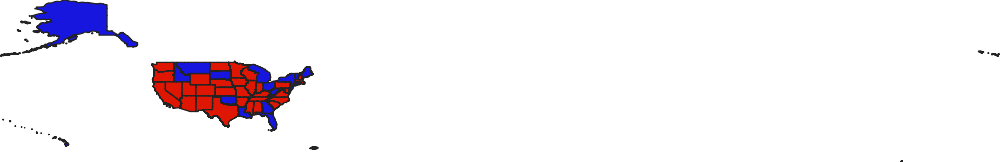

In [20]:
imgbuf = QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [21]:
qgs.exitQgis()